In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier  # MLP is an NN
from sklearn import svm
import numpy as np
import argparse
import imutils  # If you are unable to install this library, ask the TA; we only need this in extract_hsv_histogram.
import cv2  # cv2 
import os
import random
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score






Preprocess the image 

1- aplly gaussian blur to remove noise


2- apply median blur to remove salt and pepper noise


3- resize image


4- mormalize pixels values

In [96]:
def preprocess_image_fromPath(image_path, target_size=(64, 64)):
    """
    Preprocess the image by resizing, grayscaling, applying noise reduction, and normalizing.
    Args:
        image_path: Path to the image.
        target_size: Target size for resizing.
    Returns:
        Preprocessed image.
    """
    
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply a Median filter for further noise reduction (optional)
    filtered = cv2.medianBlur(blurred, 3)
    
    # Resize to the target size
    resized = cv2.resize(filtered, target_size)
    
    # Normalize pixel values to [0, 1]
    normalized = resized / 255.0
    
    return normalized

def preprocess_image(image, target_size):
    """
    Preprocess the image by resizing, grayscaling, applying noise reduction, and normalizing.
    Args:
        image: Input image.
        target_size: Target size for resizing.
    Returns:
        Preprocessed image.
    """
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply a Median filter for further noise reduction (optional)
    filtered = cv2.medianBlur(blurred, 3)
    
    # Resize to the target size
    resized = cv2.resize(filtered, target_size)
    
    # Normalize pixel values to [0, 1]
    normalized = resized / 255.0
    
    return normalized


Extract HOG features 


def extract_hog_features(...): This function is defined to compute Histogram of Oriented Gradients (HOG) features from a given grayscale image. HOG features describe the distribution of gradient orientations in an image, useful for object detection and recognition.


image: Input parameter for the preprocessed image, expected to be in grayscale format.


orientations: Number of orientation bins used to compute the gradient histogram. Default is 9, meaning the gradient direction is divided into 9 bins (e.g., 0°–20°, 20°–40°, etc.).


pixels_per_cell: Defines the size of each cell in pixels. The gradient histogram is computed for each cell. Default size is 8x8 pixels.


cells_per_block: Specifies how many cells are grouped into a block for normalization. Default is a 2x2 block of cells.


In [97]:

def extract_hog_features(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    """
    Extract HOG features from the image.
    Args:
        image: Preprocessed image (grayscale).
        orientations: Number of orientation bins.
        pixels_per_cell: Size of the cell in pixels.
        cells_per_block: Number of cells in each block.
    Returns:
        HOG feature vector.
    """


    hog_features = hog(image, orientations=orientations,
                       pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block,
                       block_norm='L2-Hys', visualize=False)
    '''
hog(image, ...): This function, imported from skimage.feature, computes the HOG features for the input image based on the specified parameters.

orientations=orientations: Specifies the number of bins for the gradient histogram.

pixels_per_cell=pixels_per_cell: Defines the dimensions of the cells for which the gradient histogram is computed.

cells_per_block=cells_per_block: Specifies the size of the block used for local contrast normalization.

block_norm='L2-Hys': Indicates the normalization method to use for the blocks. L2-Hys is a widely used normalization technique that improves robustness to lighting and contrast changes.

visualize=False: Disables the visualization of the HOG image, which is useful for debugging but not required for feature extraction.
'''
    return hog_features


Build list of features and labels for training the model 

In [ ]:

def load_dataset(dataset_path, target_size=(64, 64)):
    """
    Load images, preprocess, and extract HOG features.
    Args:
        dataset_path: Root directory of the dataset.
        target_size: Target size for resizing.
    Returns:
        Features, labels, and class mapping.
    """
    features = []
    labels = []
    class_mapping = {}

    # Generate class mapping dynamically
    class_names = sorted(os.listdir(dataset_path))  # Sort for consistent label assignment
    for idx, class_name in enumerate(class_names):
        class_mapping[class_name] = idx  # Assign an index to each class

    for class_name, label in class_mapping.items():
        class_path = os.path.join(dataset_path, class_name)
        for file_name in os.listdir(class_path):
            image_path = os.path.join(class_path, file_name)
            # Preprocess the image
            preprocessed_image = preprocess_image_fromPath(image_path, target_size)
            # Extract HOG features
            feature_vector = extract_hog_features(preprocessed_image)
            features.append(feature_vector)
            labels.append(label)

    return np.array(features), np.array(labels), class_mapping

# Define dataset path
dataset_path = r"D:\CUFE\GP\Sleep_detection\archive\mrleyedataset"

# Load dataset
X, y, class_mapping = load_dataset(dataset_path)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the class mapping
print("Class Mapping:", class_mapping)


In [38]:
import pickle


# pickle_out = open("class_mapping.pickle","wb")
# pickle.dump(class_mapping, pickle_out)
# pickle_out.close()

# pickle_out = open("X_train.pickle","wb")
# pickle.dump(X_train, pickle_out)
# pickle_out.close()

# pickle_out = open("X_test.pickle","wb")
# pickle.dump(X_test, pickle_out)
# pickle_out.close()

# pickle_out = open("y_train.pickle","wb")
# pickle.dump(y_train, pickle_out)
# pickle_out.close()

# pickle_out = open("y_test.pickle","wb")
# pickle.dump(y_test, pickle_out)
# pickle_out.close()

pickle_in = open("class_mapping.pickle","rb")
class_mapping = pickle.load(pickle_in)

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)



1- Train the model

2- Test the model

3- Evaluate the model

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train the SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the SVM
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy * 100:.2f}%")


SVM Accuracy: 96.11%


In [39]:
# save the model to disk
filename = 'SVM_model.sav'
# pickle.dump(svm_model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)


0.9611307420494699


Test the model on test images

In [99]:
def predict_image_fromPath(image_path, model, class_mapping, target_size=(64, 64)):
    """
    Predict the class of a new image.
    Args:
        image_path: Path to the image.
        model: Trained SVM model.
        class_mapping: Mapping of class names to labels.
        target_size: Target size for resizing.
    Returns:
        Predicted class name.
    """
    # Preprocess and extract features
    preprocessed_image = preprocess_image_fromPath(image_path, target_size)
    feature_vector = extract_hog_features(preprocessed_image).reshape(1, -1)
    # Predict
    prediction = model.predict(feature_vector)[0]
    # Map label back to class name
    for class_name, label in class_mapping.items():
        if label == prediction:
            return class_name

def predict_image(image, model, class_mapping, target_size=(224, 224)):
    """
    Predict the class of a new image.
    Args:
        image: Input image.
        model: Trained model.
        class_mapping: Dictionary mapping class indices to class names.
        target_size: Target size for resizing.
    Returns:
        Predicted class name.
    """
    # Preprocess and extract features
    preprocessed_image = preprocess_image(image, target_size)
    feature_vector = extract_hog_features(preprocessed_image).reshape(1, -1)
    # Predict
    prediction = model.predict(feature_vector)[0]
    # Map label back to class name
    for class_name, label in class_mapping.items():
        if label == prediction:
            return class_name

Test

In [100]:
# prdicting the image
image_path = r"D:\CUFE\GP\Sleep_detection\archive\open_eye.jpg"
predicted_class = predict_image_fromPath(image_path, svm_model, class_mapping)
print(f"Predicted Class: {predicted_class}")

Predicted Class: Open-Eyes


Eye 1: (539, 722, 45, 45)
Eye 2: (473, 706, 88, 88)
Eye 3: (701, 688, 102, 102)


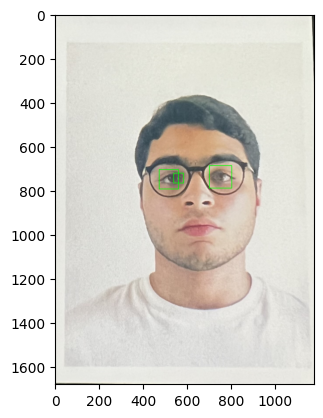

In [101]:
img = cv2.imread("archive/mido_open.jpg")
# plt.imshow(img)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
i = 0
for (x, y, w, h) in eyes:
    i += 1
    print(f"Eye {i}: ({x}, {y}, {w}, {h})")
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)  
    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))




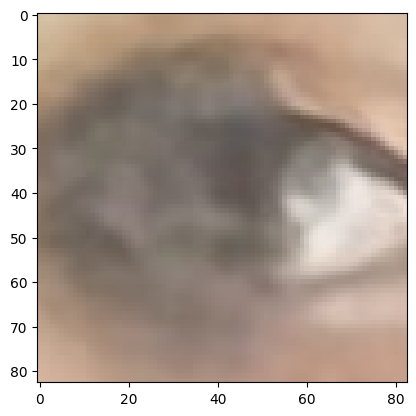

In [102]:
#CROP THE EYES
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
# eyes_roi = []
for x, y, w, h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]

plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [103]:
eyes_roi.shape

(83, 83, 3)

In [106]:
# save the image
cv2.imwrite("archive/test.jpg", eyes_roi)

True

In [107]:
test = predict_image_fromPath("archive/test.jpg", svm_model, class_mapping)
print(f"Predicted Class: {test}")

Predicted Class: Open-Eyes


In [113]:
import cv2

# Real-time detection

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
            # test = "Eyes are not detected"
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]
                cv2.imwrite("archive/test.jpg", eyes_roi)
                test = predict_image_fromPath("archive/test.jpg", svm_model, class_mapping)
                print(f"Predicted Class: {test}")

    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, test, (50, 50), font, 3, (0, 255, 0), 2, cv2.LINE_4)
    cv2.imshow('Drowsiness Detection', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Predicted Class: Open-Eyes
Predicted Class: Open-Eyes
Eyes are not detected
Predicted Class: Open-Eyes
Eyes are not detected
Eyes are not detected
Eyes are not detected
Predicted Class: Open-Eyes
Predicted Class: Open-Eyes
Eyes are not detected
Predicted Class: Open-Eyes
Predicted Class: Open-Eyes
Eyes are not detected
Eyes are not detected
Predicted Class: Close-Eyes
Predicted Class: Open-Eyes
Predicted Class: Open-Eyes
Predicted Class: Open-Eyes
Predicted Class: Close-Eyes
Predicted Class: Open-Eyes
Predicted Class: Open-Eyes
Predicted Class: Close-Eyes
Predicted Class: Open-Eyes
Predicted Class: Close-Eyes
Predicted Class: Open-Eyes
Predicted Class: Close-Eyes
Predicted Class: Open-Eyes
Predicted Class: Close-Eyes
Predicted Class: Open-Eyes
Predicted Class: Close-Eyes
Predicted Class: Open-Eyes
Predicted Class: Open-Eyes
Predicted Class: Close-Eyes
Predicted Class: Open-Eyes
Predicted Class: Close-Eyes
Predicted Class: Open-Eyes
Predicted Class: Close-Eyes
Predicted Class: Open-Eyes